In [212]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [213]:
dates = pd.read_excel("dates.xlsx", sheet_name="Лист1")

In [214]:
x_dates = np.arange(np.datetime64('2022-08-01'), np.datetime64('2022-09-18'), dtype='datetime64[D]')
y_atm_pr = dates['Pressure']

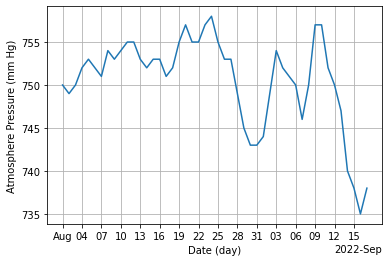

In [215]:
from datetime import datetime, timedelta
import matplotlib as mpl
fig, ax = plt.subplots()
x = x_dates
y = dates["Pressure"]
ax.plot(x, y)
# ax.set(xlim=(0, 40), xticks=np.arange(0,41,5), ylim=(0, 100), yticks=np.arange(0,101, 10))
ax.set(xticks=np.arange(np.datetime64('2022-08-01'), np.datetime64('2022-09-18'), np.timedelta64(3,'D')))
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf);
ax.set_xlabel('Date (day)')
ax.set_ylabel('Atmosphere Pressure (mm Hg)')
# ax.set_title('Climate')
ax.grid('True')
plt.show()
fig.savefig("plot_easy.png")

In [216]:
arr = y_atm_pr.copy()
window_size = 3

i = 0
# Initialize an empty list to store moving averages
moving_averages_3 = np.array([])
  
# Loop through the array to consider
# every window of size 3
while i < arr.size - window_size + 1:
    
    # Store elements from i to i+window_size
    # in list to get the current window
    window = arr[i : i + window_size]
  
    # Calculate the average of current window
    window_average = np.round(np.sum(window) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
    moving_averages_3 = np.append(moving_averages_3, [[window_average]])
      
    # Shift window to right by one position
    i += 1

In [217]:
arr = y_atm_pr.copy()
window_size = 4

i = 0
# Initialize an empty list to store moving averages
moving_averages_4 = np.array([])
  
# Loop through the array to consider
# every window of size 4
while i < arr.size - window_size + 1:
    
    # Store elements from i to i+window_size
    # in list to get the current window
    window = arr[i : i + window_size]
  
    # Calculate the average of current window
    window_average = np.round(np.sum(window) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
    moving_averages_4 = np.append(moving_averages_4, [[window_average]])
      
    # Shift window to right by one position
    i += 1

In [218]:
arr = y_atm_pr.copy()
window_size = 5

i = 0
# Initialize an empty list to store moving averages
moving_averages_5 = np.array([])
  
# Loop through the array to consider
# every window of size 5
while i < arr.size - window_size + 1:
    
    # Store elements from i to i+window_size
    # in list to get the current window
    window = arr[i : i + window_size]
  
    # Calculate the average of current window
    window_average = np.round(np.sum(window) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
    moving_averages_5 = np.append(moving_averages_5, [[window_average]])
      
    # Shift window to right by one position
    i += 1

In [219]:
arr = y_atm_pr.copy()
window_size = 6

i = 0
# Initialize an empty list to store moving averages
moving_averages_6 = np.array([])
  
# Loop through the array to consider
# every window of size 6
while i < arr.size - window_size + 1:
    
    # Store elements from i to i+window_size
    # in list to get the current window
    window = arr[i : i + window_size]
  
    # Calculate the average of current window
    window_average = np.round(np.sum(window) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
    moving_averages_6 = np.append(moving_averages_6, [[window_average]])
      
    # Shift window to right by one position
    i += 1

In [220]:
moving_averages = [moving_averages_3, moving_averages_4, moving_averages_5, moving_averages_6]

In [221]:
y_atm_pr_for_3 = y_atm_pr[1:1+moving_averages_3.size]
y_atm_pr_for_4 = y_atm_pr[1:1+moving_averages_4.size]
y_atm_pr_for_5 = y_atm_pr[2:2+moving_averages_5.size]
y_atm_pr_for_6 = y_atm_pr[2:2+moving_averages_6.size]
y_atm_pr_for = [y_atm_pr_for_3, y_atm_pr_for_4, y_atm_pr_for_5, y_atm_pr_for_6]

In [222]:
mse3 = np.sqrt(np.sum(np.square(np.subtract(y_atm_pr_for_3, moving_averages_3)))/3)
mse4 = np.sqrt(np.sum(np.square(np.subtract(y_atm_pr_for_4, moving_averages_4)))/4)
mse5 = np.sqrt(np.sum(np.square(np.subtract(y_atm_pr_for_5, moving_averages_5)))/5)
mse6 = np.sqrt(np.sum(np.square(np.subtract(y_atm_pr_for_6, moving_averages_6)))/6)
mse = [mse3, mse4, mse5, mse6]

In [223]:
mse_index = mse.index(np.min(mse))

In [224]:
moving_averages_min = moving_averages[mse_index]
y_atm_pr_for_min = y_atm_pr_for[mse_index]

In [225]:
mv = pd.Series(index = np.arange(1, moving_averages_min.size+1), data = moving_averages_min)

In [226]:
mv.to_excel("moving_averages.xlsx")

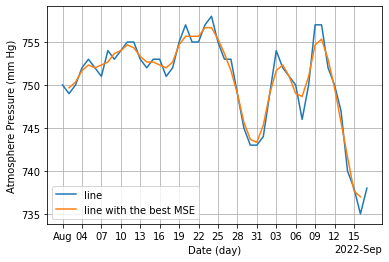

In [227]:
from datetime import datetime, timedelta
import matplotlib as mpl
fig, ax = plt.subplots()
x = x_dates
y = dates["Pressure"]
ax.plot(x, y, label = "line")
# ax.set(xlim=(0, 40), xticks=np.arange(0,41,5), ylim=(0, 100), yticks=np.arange(0,101, 10))
x_new = x_dates[1:moving_averages_min.size+1]
# y_new = dates_with_the_best_err["Pressure"]
y_new = moving_averages_min
ax.plot(x_new, y_new, label = "line with the best MSE")
ax.set(xticks=np.arange(np.datetime64('2022-08-01'), np.datetime64('2022-09-18'), np.timedelta64(3,'D')))
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf);
ax.set_xlabel('Date (day)')
ax.set_ylabel('Atmosphere Pressure (mm Hg)')
# ax.set_title('Climate')
ax.grid('True')
ax.legend()
plt.show()
fig.savefig("plot1.png");

In [228]:
mu = np.mean(y_atm_pr)
sigma = np.std(y_atm_pr)

In [229]:
h = (np.max(np.sort(y_atm_pr))-np.min(np.sort(y_atm_pr)))/(1+3.322*np.log10(48))

In [230]:
y_atm_pr_with_h = np.arange(np.min(y_atm_pr), np.max(y_atm_pr)+1, h)

In [231]:
y_atm_pr_with_h

array([735.        , 738.49274241, 741.98548481, 745.47822722,
       748.97096962, 752.46371203, 755.95645443])

In [232]:
min_y = np.min(y_atm_pr)
max_y_1 = np.max(y_atm_pr)
max_y_2 = np.max(y_atm_pr_with_h)

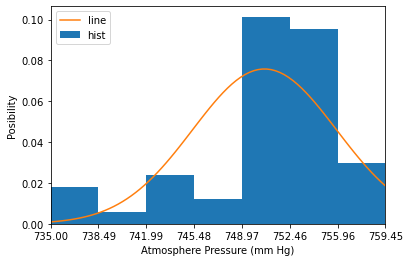

In [233]:
fig, ax = plt.subplots()
# dates = pd.read_excel("dates.xlsx", sheet_name="Лист1")
# y_atm_pr = dates['Pressure']
count, bins, ignored = ax.hist(np.sort(y_atm_pr), bins = np.arange(min_y, max_y_2+2*h, h), density=True, label='hist')
# ax.plot(bins, 1/(sigma * np.sqrt(2 *np.pi)) *
#         np.exp( - (bins - mu)**2/ (2 * sigma**2) ),
#         linewidth=2, color='r', label='line')
# [h for i in range(y_atm_pr_with_h.size-1)]
# ax.set(xlim=(np.min(data2),np.max(data2)), xticks=np.arange(np.min(data2), np.max(data2_with_h), h))
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = np.mean(y_atm_pr)
sigma = np.std(y_atm_pr)
# sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax.plot(x, stats.norm.pdf(x, mu, sigma), label='line')
dates = pd.read_excel("dates.xlsx", sheet_name="Лист1")
y_atm_pr = dates['Pressure']
ax.set(xlim=(min_y, max_y_2+h),xticks=np.arange(min_y, max_y_2+2*h, h))
# ax.axis([15, 108, 0, 0.033])
# ax.annotate('local max', xy=(np.mean(data2), 200), xytext=(np.mean(data2), 100),
#             arrowprops=dict(facecolor='black', shrink=0.05))
# ax.set_xlim(np.min(data2), np.max(data2))
# ax.set(xlim=(np.min(data2),np.max(data2)), xticks=np.linspace(np.min(data2), np.max(data2_with_h), data2_with_h.size))
ax.set_xlabel('Atmosphere Pressure (mm Hg)')
ax.set_ylabel('Posibility')
# ax.set_title('Histogram')
ax.legend()
plt.show()
fig.savefig("hist1.png");

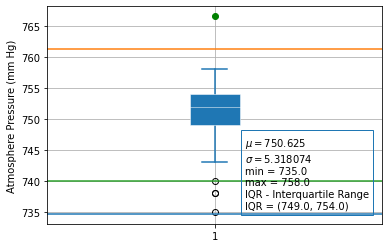

In [234]:
import numpy as np
import matplotlib.pyplot as plt


fig1, ax = plt.subplots()
ax.boxplot(y_atm_pr,patch_artist=True,  medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
ax.plot(1, 766.579222,'o-', color='green')
ax.plot([0.5, 1, 1.5], [734.67, 734.67, 734.67])
ax.plot([0.5, 1, 1.5], [761.261148, 761.261148, 761.261148])
ax.plot([0.5, 1, 1.5], [739.988852, 739.988852, 739.988852])

ax.text(1.09, 735.5, r"$\mu=750.625$" + "\n" + r"$\sigma=5.318074$" + "\n"  +  "min = 735.0" + "\n" + "max = 758.0" + "\n" \
        + "IQR - Interquartile Range" + "\n" + "IQR = (749.0, 754.0)", bbox=dict(facecolor='none', edgecolor='C0'))
ax.grid('True')


# ax.set_title('Boxplot')
ax.set_ylabel("Atmosphere Pressure (mm Hg)")
plt.show()
fig.savefig("boxplot2.png");

In [235]:
import numpy as np

#define custom function
def g_mean(x):
    a = np.log(x)
    return np.exp(a.mean())

#calculate geometric mean 

In [236]:
from scipy.stats import skew
skew = skew(y_atm_pr, axis=0, bias=True)
from scipy.stats import kurtosis
kurtosis = kurtosis(y_atm_pr, axis=0, bias=True)

In [237]:
skew = np.round(skew, 3)
kurtosis = np.round(kurtosis, 3)

In [238]:
skew

-1.199

In [239]:
kurtosis

0.963

In [240]:
min = np.min(y_atm_pr)
max = np.max(y_atm_pr)

In [241]:
from scipy import stats as st
import numpy as np
mode_start = st.mode(y_atm_pr)

In [242]:
mean_chron = ((y_atm_pr[0]+y_atm_pr[y_atm_pr.size-1])/2 + np.sum(y_atm_pr[1:-1]))/ (y_atm_pr.size-1)

In [243]:
mean = dates.describe().loc['mean'].astype(int)[0]
median_Q2 = dates.describe().loc['50%'].astype(int)[0]
mode = np.floor(mode_start).astype(int)[0,0]
std = dates.describe().loc['std'].astype(int)[0]
Q1 = dates.describe().loc['25%'].astype(int)[0]
Q3 = dates.describe().loc['75%'].astype(int)[0]
g_mean_int = np.floor(g_mean(y_atm_pr)).astype(int)
count = y_atm_pr.size
mean_chron = np.floor(mean_chron).astype(int)

In [244]:
statistic_table = pd.Series(data=[mean, median_Q2, mode, std, Q1, Q3, g_mean_int, skew, kurtosis, count, mean_chron], index=["mean", "median(Q2)", "mode", "std", "Q1", "Q3", "g_mean", "skew", "kurtosis", "count", "mean_chron"])

In [245]:
statistic_table

mean          750.000
median(Q2)    752.000
mode          753.000
std             5.000
Q1            749.000
Q3            754.000
g_mean        750.000
skew           -1.199
kurtosis        0.963
count          48.000
mean_chron    750.000
dtype: float64